In [1]:
# Asegúrate de que la ruta al archivo sea correcta
include("ClusterProperties.jl")
using .ClusterPhysicsModule

# Define los parámetros para Chromium
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)



Módulo ClusterPhysics cargado sin usar Unitful.


Dict{String, Any} with 11 entries:
  "method"                => "melting"
  "mass_density"          => 2500
  "temperature"           => 750
  "sigma"                 => 0.15
  "diffusivity_factor"    => 2.0e-9
  "supersaturation_ratio" => 1.1
  "melting_point"         => 1300
  "heat_fusion"           => 52000.0
  "molar_mass"            => 0.15005
  "jump_distance"         => 4.6e-10
  "activation_energy"     => 52920.2

In [1]:
include("ClusterDynamics.jl") # Si guardaste el código en un archivo separado.

Módulo ClusterPhysics cargado sin usar Unitful.


simulate (generic function with 1 method)

In [2]:
MAX_NUMBER_MOLECULES = 40
number_clusters_start = 2
#dt = 1e-8/unbiased_jump_rate(cluster_physics)
dt = 1e19

1.0e19

In [3]:
params = Dict(
    "temperature" => 750,
    "activation_energy" => 52920.2,  # Convertir a joules si es necesario
    "diffusivity_factor" => 2e-9,
    "jump_distance" => 4.6e-10,
    "molar_mass" => 150.05*1e-3,
    "mass_density" => 2500,
    "melting_point" => 1300,
    "heat_fusion" => 52 * 1e3,  # Asegurarse de que las unidades sean consistentes
    "sigma" => 0.15,
    "supersaturation_ratio" => 1.1,
    "method" => "melting"
)


dn = JuliaClusterDynamics(params, 1e5, dt, number_clusters_start, MAX_NUMBER_MOLECULES, "closed");

In [5]:
# Llama a simulate! para ejecutar la simulación y almacenar la solución
@time solution = simulate(dn; method=Rodas4(), rtol=1e-4, atol=1e-4);
println("La simulación fue exitosa: ", solution.retcode)

  1.500746 seconds (1.19 M allocations: 80.830 MiB, 4.09% gc time, 99.59% compilation time)
La simulación fue exitosa: Success


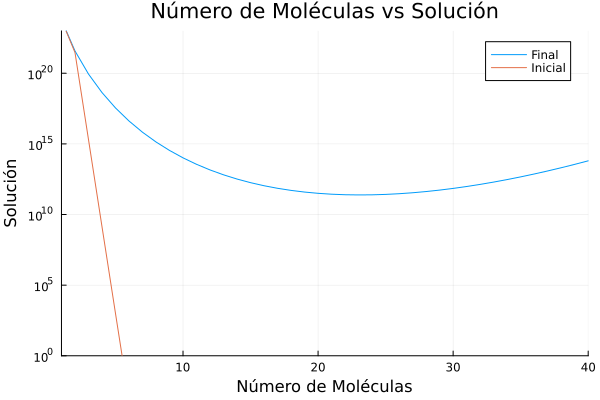

In [12]:
using Plots
number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)
# Suponiendo que `y_final` es tu solución final y `number_molecules_array` contiene el número de moléculas correspondiente
plot(number_molecules_array, solution[:,end], yscale=:log10, label="Final",
    xlabel="Número de Moléculas", ylabel="Solución",
    xlims=(1, 40),ylims=(1,1e23) ,yticks=10.0 .^ (-20:5:20))
    
 plot!(number_molecules_array, solution[:,20], yscale=:log10, label="Inicial", legend=:topright)


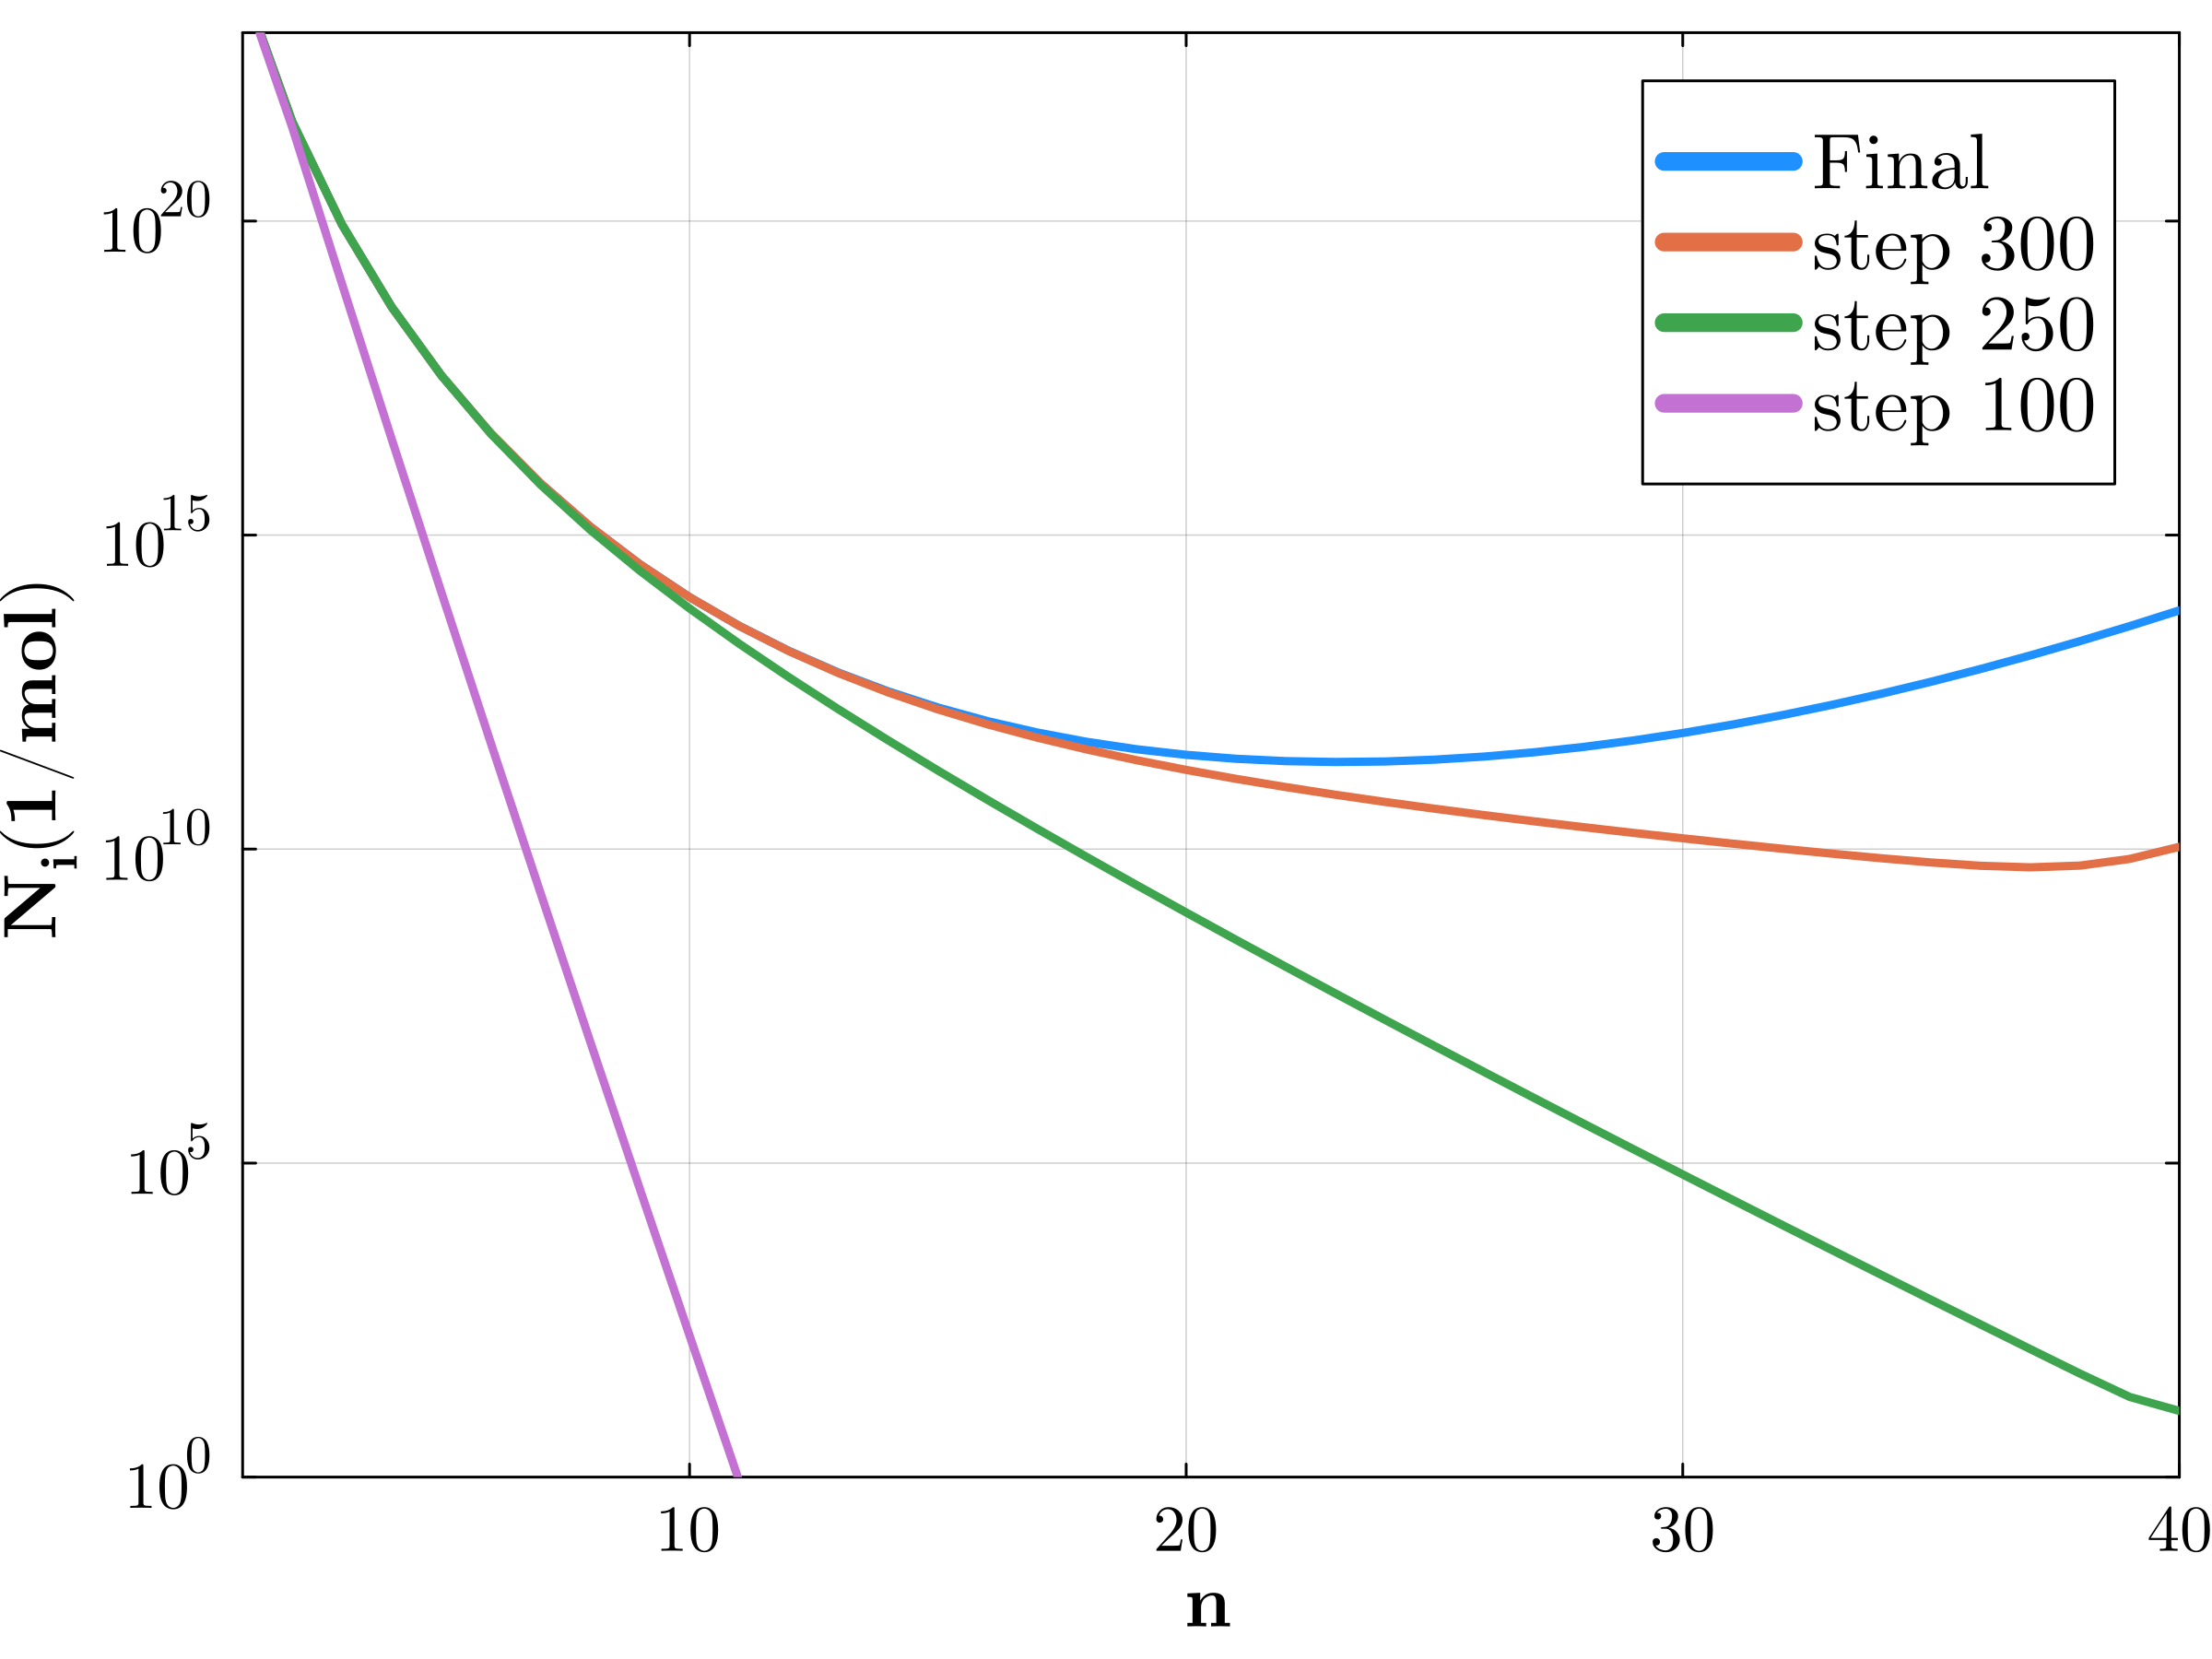

In [44]:
using Plots
# Asegúrate de tener LaTeXStrings para usar LaTeX en etiquetas y títulos
using LaTeXStrings

# Establece el backend y el tamaño del gráfico
gr(size=(800, 600))

number_molecules_array = collect(1:MAX_NUMBER_MOLECULES)

# Define colores más atractivos
colores = [:dodgerblue, :coral]

# Ajustes de estilo global para las gráficas
default(
    framestyle=:box,
    legend=:topright,
    line=(:solid, 3),  # Aumenta el grosor de las líneas
    fontfamily="Computer Modern",  # Esto es lo más cercano a un estilo LaTeX clásico
    size=(800, 600),  # Ajusta el tamaño de la gráfica aquí si no se ajustó antes
    dpi=300
)


# Escala de los ejes y etiquetas en formato LaTeX con un tamaño de fuente más grande
plot(number_molecules_array, solution[:, end], yscale=:log10, label="Final",
    xlims=(1, 40), ylims=(1,1e23), yticks=10.0 .^ (-20:5:20),
    legendfontsize=12, titlefontsize=14, guidefontsize=12, tickfontsize=10,
    color=colores[1])

plot!(number_molecules_array, solution[:, 300], yscale=:log10, label="step 300",
)
    
plot!(number_molecules_array, solution[:, 250], yscale=:log10, label="step 250",
)
 
plot!(number_molecules_array, solution[:, 100], yscale=:log10, label="step 100",
)

# Personalizar aún más con LaTeXStrings si es necesario
plot!(xlabel=L"\mathbf{n}", ylabel=L"\mathbf{N_i (1/mol)}",
      legendfontsize=18, guidefontsize=18, tickfontsize=15)

# Mostrar el gráfico
